# DATA ANALYSIS TEMPLATE

provide a template for machine learning data analysis

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from flowkapd import fpd
from flowkacol import fcol
from flowkapr import *
from flowkafunc import unionlist,nvl,talk,isinlist
pd.set_option('display.max_columns', 500)
talk=False
import warnings
warnings.filterwarnings("ignore")

# Parameters

** set algo and dataset name **

In [2]:
files={'auto'   : "http://www-bcf.usc.edu/~gareth/ISL/Auto.csv",
       'college': "http://www-bcf.usc.edu/~gareth/ISL/College.csv",
       'credit' : "http://www-bcf.usc.edu/~gareth/ISL/Credit.csv",
       'heart'  : "http://www-bcf.usc.edu/~gareth/ISL/Heart.csv",
       'customers':"http://www.ladrauniere.fr/opendata/Ecommerce_Customers.csv",
       'advertising': "http://www.ladrauniere.fr/opendata/advertising.csv",
       'salaries': "http://www.ladrauniere.fr/opendata/Position_Salaries.csv",
       'startups': "http://www.ladrauniere.fr/opendata/50_Startups.csv",
       'kyphosis': "http://www.ladrauniere.fr/opendata/kyphosis.csv",
       'loan': "http://www.ladrauniere.fr/opendata/loan_data.csv",
       'housing': "http://www.ladrauniere.fr/opendata/USA_Housing.csv",
       'titanic': "http://www.ladrauniere.fr/opendata/titanic.csv",
       'iris': "http://www.ladrauniere.fr/opendata/iris.csv",
      }

# get data

In [3]:
name='advertising'
mode='distant'
if mode=='local':
    dataset=fpd(pd.read_csv('/home/david/PythonProjects/data'+name+'.csv'),name)
else: 
    dataset=fpd(pd.read_csv(files[name]),name)
print(dataset.version)

dataset._talk.quiet#/dataset._talk.quiet

flowka.fpd version is 0.25


False

In [4]:
#HTML Files    
#run = pd.read_html("http://www.kikourou.net/resultats/resultat-109864-eco-trail_de_paris_ile_de_france_-_80_km-2017.html",attrs={'id':'results'},header=0)
#dataset=fpd(run[0],'run')
#dataset=fpd(pd.read_csv('./work/fried.csv'),'fried')
#pd.read_html importe une liste de DataFrames (il peut y avoir plusieurs tables dans une page html)
#par exemple :
#data=pd.read_html("page.html")
#table=data[0]

# import METADATA

In [5]:
dataset.fmd.load()
print("SUGGESTED : {0}".format(dataset.fmd.suggested_param()))

import metadata from ./work/flowka_metadata_info.dat
SUGGESTED : {'drop': "['Ad Topic Line', 'City']", 'ordinals': nan, 'frequencies': "['Country']", 'clusters': nan, 'category': "['Ad Topic Line', 'City', 'Country', 'Timestamp']", 'algo': 'forClass', 'targets': 'Clicked on Ad', 'dummies': '[]'}


# colors

In [6]:
sns.set_style('whitegrid')
dataset.fcol.palette=None
dataset.fcol.cmap=None
dataset.fcol.color=None

# data summary

** build a new info function ** <br/>
provide some details informations about distincts and nans <br/>


In [8]:
#statistics
#dataset.describe()
dataset.details


,Ad Topic Line,Age,Area Income,City,Clicked on Ad,Country,Daily Internet Usage,Daily Time Spent on Site,Male,Timestamp
10%,NaN,26,34942.3,NaN,0,NaN,120.37,41.28,0,NaN
25%,NaN,29,46974.2,NaN,0,NaN,138.71,51.3,0,NaN
50%,NaN,35,57012.3,NaN,0.5,NaN,183.13,68.215,0,NaN
75%,NaN,42,65496.8,NaN,1,NaN,218.8,78.57,1,NaN
90%,NaN,49,70510.6,NaN,1,NaN,236.19,83.91,1,NaN
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
distinct,1000,43,1000,969,2,237,966,900,2,1000
distratio,1,0.043,1,0.969,0.002,0.237,0.966,0.9,0.002,1
dtype,category,int64,float64,category,int64,category,float64,float64,int64,category
max,Visionary reciprocal circuit,61,79484.8,Zacharyton,1,Zimbabwe,269.96,91.43,1,2016-07-24 00:22:16


In [9]:
#first 5 rows 
dataset.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# RUN BATCH

In [10]:
autolog=['unknowns()',
         "splitize(column='name',separ=' ', keeplist=[0],itemnames=['brand'],drop=True)",
         "floatize(['horsepower'])",
         "nan_replace(mode='median',columns=['horsepower'],value=0)",
         "_set_targets(targets='mpg')",
         "set_frequencies(['brand'])"]
runlog=["timize(column='Perf',timeformat=\"%Hh%M'%S''\",timelist=['time','hour'],drop=True)",
        "substrize(column='Cat',splitpos=[2,3],keeplist=[0,1],itemnames=['Cat','Genre'],drop=True)"]
housinglog=['_set_category(catlist=None)',
            "_set_targets(targets='Price')",
            'unknowns()',
            'unknowns()',
            "regexize(column='Address',regexstr='[\\W|\\w]*([A-Z]{2})[\\W|\\w]*',keeplist=[1],itemnames=['State'],drop=True)",
            "_set_drop(['Address'])",
            '_set_category(categorigals=None)',
            "_set_drop(['Address'])",
            'drop_allnans()',
            'drop_anynans()',
            "_set_category(categoricals=['brand'])",
            "set_frequencies(columns=['State'])"]
titaniclog=["boolnotnans(['Cabin'])"]
titaniclog=["_set_targets(targets = 'Survived')", 
            'unknowns()',
            "substrize(column='Cabin',splitpos=[1],keeplist=[0],itemnames=['TypeCabin'],drop=True)",
            "_set_drop(['PassengerId', 'Ticket', 'Name'])",
            "nan_replace(mode='mostfreq',columns=['Embarked'], value=0)",
            "nan_replace(mode='median',columns=['Age'], value=0)",
            "set_ordinals(column='TypeCabin',categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])",
            "set_dummies(columns=['Sex', 'Embarked'])"]
startupslog=["set_dummies(columns=['State'])",
            "_set_targets(targets='Profit')"]
advertisinglog=["_set_targets(targets = 'Clicked on Ad')",
                "timize(column='Timestamp',timeformat='%Y-%m-%d %H:%M:%S',timelist=['hour', 'weekday'],drop=True)",
                "_set_drop(['Ad Topic Line', 'City'])",
                "set_frequencies(columns=['Country'])",
                "set_dummies(columns=['Timestamp_hour', 'Timestamp_weekday'])"]

In [11]:
batch=True
if batch:
    dataset.batch(advertisinglog)

# TARGET

***suggested***

In [12]:
dataset.fmd.suggested_param()['targets']

'Clicked on Ad'

In [13]:
#input the dataset target
#dataset.targets='X'
if dataset.fmd.suggested_param()['targets'] == '':
    # iteractive input / prompt
    #no quote : cylinders
    print("chose in {0}".format(list(dataset.df.columns)))
    targets=input('type a targets column :')
else:
    targets=dataset.fmd.suggested_param()['targets']
dataset.targets=targets
print('TARGETS = "{0}"'.format(dataset.targets))

TARGETS = "Clicked on Ad"




# CLEAN DATA



<table style="width:100" border="0px">
<tr>
    <th>***NUMERIC***</th>
    <th>***CATEGORICAL***</th>
    <th>***STRINGS***</th>
    <th>***MISSING VALUES***</th>
</tr>
<tr>
    <td>discrete<br>continuous<br>boolean<br></td>
    <td>ordinal<br>dummies<br>frequencies<br></td>
    <td>drop names<br>split<br>substring<br>regex<br></td>
    <td>drop all nan columns<br>drop column with any nan<br></td>
</tr>
<tr>
    <td></td>
    <td></td>
    <td></td>
    <td>**fill na with:**<br>mean<br>median<br>max<br>min<br>most frequent value<br>less frequent value<br>specific value<br>boolean nan split<br></td>
</tr>

**kind of #nan**<br/>
replace unknown values, "?",... with nan

In [ ]:
dataset.unknowns()

**batch and special columns** <br/>
split descriptions or categories / titles / times in smaller categorical columns

In [ ]:
#fill the needed function
dataset.splitize(column=[],separ=' ',keeplist=[0], itemnames=None, drop=True)
dataset.substrize(column=[], splitpos=[], keeplist=[0], itemnames=None, drop=True)
dataset.boolnotnans(columns=[], values=[0, 1])
dataset.timize(column=[], timeformat='%d%m%Y-%H:%M:%S.%f', timelist=['time'], drop=True)
dataset.regexize(column=[],regexstr='', keeplist=[0], itemnames=None, drop=True)
dataset.timize(column='Timestamp', timeformat='%Y-%m-%d %H:%M:%S', timelist=['hour','weekday'], drop=True)

# DROP

** drop large categories, ids, descriptions and names...**<br>
determines categorical columns with too-much distinct values and remove them

***#automatic***

In [ ]:
autodroplist=dataset.automatic_drop()
autodroplist

***#suggested param***

In [ ]:
suggdroplist=dataset.fmd.suggested_param()['drop']
suggdroplist

***#personal droplist***

In [ ]:
persdroplist=['Ad Topic Line','City']

***#set droplist***

In [ ]:
droplist=unionlist(suggdroplist,autodroplist,persdroplist)
dataset.drop=droplist

**identify columns with nan**

In [ ]:
#dislay missing values
dataset.missing_values()

In [ ]:
dataset.histmap(list(dataset.missing_values().index))

**replace by mean** (for quantitative values)

In [ ]:
dataset.nan_replace(mode='mostfreq',columns=['Embarked'],value=0)

In [ ]:
dataset.nan_replace(mode='median',columns=['horsepower'],value=0)

***bool not nans***<br>
replace by True(1) when not nans and False(0) when nans<br>
assert 'having a value' means something by itself

In [ ]:
dataset.boolnotnans(columns=['Cabin'])

**drop columns with all nan**

In [ ]:
dataset.drop_allnans()

**drop rows with some nans** <br>
if needed (for categorical values)<br>
by default nans in categorical columns will be trnasform into zeros<br>


In [ ]:
#de-comment line below for droping rows with categorical nans
#dataset.drop_anynans()

** Infos about transformed dataset **

In [ ]:
#dataset.details

# transform categorical columns / dummies

**display quantitative / categorical columns **<br>
before transform into dummies

In [ ]:
#quantitative columns
pd.DataFrame(dataset.continuous,columns=['continuous'])

In [ ]:
#categorical columns
pd.DataFrame(dataset.category,columns=['category'])


**insert some quantitative columns to categorical**<br>
(age, level, rank...)

In [ ]:
dataset.category=['R']

***set categorical in count distribution ***<br>
['A','B','C','A','A','B'] -> [3,2,1,3,3,2] 

In [ ]:
dataset.set_frequencies(['Country'])

***transform categorical into ordinals***<br>
rating ['good','intermediate','bad'] -> [1,2,3]

In [ ]:
dataset.unique('Cabin')

In [ ]:
#dataset.set_ordinals('Cat',['ES','SE','V1','V2','V3','V4'])
dataset.set_ordinals('Cabin',['A','B','C','D','E','F','G','T'])

**transform categorical into dummies**

In [ ]:
dataset.set_dummies(['Timestamp_hour','Timestamp_weekday'])

# display tranformed dataset

In [ ]:
dataset.head(5)

# statistical distribution

**limit graphic samples**<br>
choose *n* between 100 and 10000<br>
display graphic ? : set *SHOWGRAPH= True/False*


In [ ]:
dataset.maxshowsamples=3000
SHOWGRAPH=True

In [ ]:
if SHOWGRAPH:
    dataset.histmap()

# investigate some basic correlations

<h2> correlation overview</h2>

** heatmap **<br>
point out linear correlation

In [ ]:
if SHOWGRAPH:
    #dataset.heatmap(cmap=dataset.flowkaPalette)
    dataset.heatmap()

** "pairplot" **<br>
visualization map of possible correlations between couple of variables<br>
hue with target values

In [ ]:
if SHOWGRAPH:
    import datetime as dt
    print(dt.datetime.now().hour,dt.datetime.now().minute,dt.datetime.now().second)
    st=dt.datetime.now()

    
    dataset.pairplot()

    print(dt.datetime.now().hour,dt.datetime.now().minute,dt.datetime.now().second)
    fi=dt.datetime.now()
    print(fi-st)


** Zoom in some columns**<br>
Based on this plots, what looks to be the most correlated feature ?


In [ ]:
if SHOWGRAPH:
    import datetime as dt
    print(dt.datetime.now().hour,dt.datetime.now().minute,dt.datetime.now().second)
    st=dt.datetime.now()
    dataset.lmplot()

    print(dt.datetime.now().hour,dt.datetime.now().minute,dt.datetime.now().second)
    fi=dt.datetime.now()
    print(fi-st)


# Training and Testing Data¶


In [14]:
from flowkamo import fmo
mo=fmo(dataset)

**Normalization**<br>
Xi/(max(Xi)-min(Xi))<br>
**Standardization**<br>
(Xi-mean(Xi))/StdDev(Xi)

In [ ]:
mo.scale().head(0)

**split test and train**<br/>
Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

# Training the Model

Now its time to train our model on our training data!

In [15]:
dataset.clusters=None

** algorithm**

In [16]:
print("predict : {0}".format(dataset.targets))
print("algo    : {0}".format(dataset.fmd.suggested_param()['algo']))

predict : Clicked on Ad
algo    : forClass


In [17]:
mo.detect_algo()

algos : ['forClass', 'treeClass', 'svm', 'logRegr', 'knn']


['forClass', 'treeClass', 'svm', 'logRegr', 'knn']

In [18]:
#choose a specific algo
#mo.algo='linRegr'

In [19]:
if dataset.fmd.suggested_param()['algo'] not in mo.detect_algo():
    print ('WARNING : suggested algo does not fit\nrun all possibles and select the best')
    mo.best_predict(mo.detect_algo())
else:
    mo.algo=mo.ds.fmd.suggested_param()['algo']

algos : ['forClass', 'treeClass', 'svm', 'logRegr', 'knn']
forClass : Random Forest Classifier


**Train/fit on the training data.**

## Predicting Test Data
Model is fit<br>
predicting off the test values


# Regression


**Print out the coefficients of the model**<br>
olding all other features fixed, a 1 unit increase in Xi is associated with an increase of Y (eg:total dollars spent)

**Create a scatterplot of the real test values versus the predicted values.**

## Evaluating the Model

evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

**  Mean Absolute Error - Mean Squared Error - Root Mean Squared Error

# Classification

<h1>confusion matrix</h1>

<table style="width:100" border="1px">
  <tr>
    <th colspan="2"></th>
    <th colspan="2">**prediction**</th>
  </tr>
  <tr>
    <th colspan="2"></th>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <th rowspan="2">**observation**</th>
    <td>0</td>
    <td>TN</td>
    <td>FP</td>
  </tr>
  <tr>
     <td>1</td>
    <td>FN</td>
    <td>TP</td>
   </tr>
</table>

FP est une alerte : on prédit quelque chose et il ne se produit pas<br/>
FN plus grave que FP (on ne predit pas un tremblement de terre et il se produit) <br/>

**precision :**<br> 
TP/(FP+TP)<br>
TN/(FN+TN)<br>
nb de documents correctement attribués à la classe i / nombre d'éléments attribués à la classe i<br>
**rappel :** <br>
TP/(TP+FN) (sensitivity)<br>
TN/(TN+FP) (specificity)<br>
nb de documents correctement attribués à la classe i / nombre d'éléments appartenants effectivement à la classe i<br>
**f1-score :**<br>
précision*rappel/(précision+rappel)<br>

**accuracy rate** = (TP+TN)/(TP+TN+FP+FN)<br/>
**error rate**    = (FP+FN)/(TP+TN+FP+FN)<br/>




     0    1
0  152    5
1    7  136


             precision    recall  f1-score   support

          0       0.96      0.97      0.96       157
          1       0.96      0.95      0.96       143

avg / total       0.96      0.96      0.96       300



accuracy rate 	: 0.96
error rate 	: 0.04




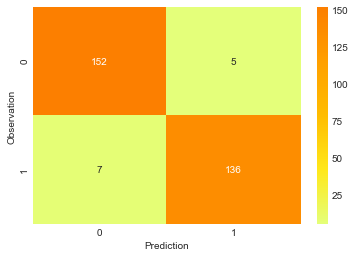

In [20]:
mo.reports()

# SAVE TRAINING
data<br>
metadata<br>
logs/batchs<br>
model<br>


In [21]:
dataset.save()

data exported to ./work/flowka_advertising.csv


In [22]:
dataset.fmd.save()

metadata exported to ./work/flowka_metadata


In [23]:
dataset.savelog()

In [24]:
mo.save_model(model_file=None)

model ./work/flowka_model_advertising.dat saved


# MANUAL PREDICTION    

**display a template for input new data**<br>
<ul>
<li>copy and paste the *output*,</li>
<li>change the values</li>
<li>the lists may have many items but the number of items per list have to be equal</li>
<li>execute the *cell*</li>


In [25]:
dataset.sample_template()

manual={
'Country': ['Venezuela'],
'Daily Internet Usage': [150.83000000000001],
'Ad Topic Line': ['Configurable interactive contingency'],
'Male': [1],
'Daily Time Spent on Site': [41.159999999999997],
'Clicked on Ad': [1],
'Area Income': [59448.440000000002],
'City': ['Hendrixmouth'],
'Age': [49],
'Timestamp': ['2016-03-28 09:15:58'] 
}


In [26]:
manual={
'Clicked on Ad': [1,0,0,1],
'Timestamp': ['2016-02-15 07:27:41','2016-01-27 16:06:05','2016-03-18 17:35:40','2016-03-28 09:15:58'],
'Ad Topic Line': ['Stand-alone motivating moratorium','User-centric discrete success','Function-based fault-tolerant model','Configurable interactive contingency'],
'Daily Time Spent on Site': [66.120000000000005,72.81,65.76,41.16],
'City': ['South Alexisborough','Jonesmouth','Contrerasshire','Hendrixmouth'],
'Country': ["Cote d'Ivoire",'Czech Republic','Eritrea','Venezuela'],
'Area Income': [39031.89,75769.82,42162.9,59448.4],
'Male': [0,1,1,1],
'Daily Internet Usage': [113.8,191.81,218.6,150.83],
'Age': [49,34,21,49] 
}
   

In [27]:
dataset._silent=False
dataset.silent_category

False

In [28]:
mo.algo

'forClass'

In [29]:
dataset=fpd(pd.DataFrame(manual),'advertising')

In [30]:
predictsave(pd.DataFrame(manual),'advertising','./work/pred_advertising')

load dataset
clean data
_set_targets(targets = 'Clicked on Ad')
targets set to Clicked on Ad
timize(column='Timestamp',timeformat='%Y-%m-%d %H:%M:%S',timelist=['hour', 'weekday'],drop=True)
add:['Timestamp_hour']
add:['Timestamp_weekday']
drop:Timestamp
_set_drop(['Ad Topic Line', 'City'])
drop:['Ad Topic Line', 'City']
set_frequencies(columns=['Country'])
frequencies : ['Country'] 
set_dummies(columns=['Timestamp_hour', 'Timestamp_weekday'])
add:['Timestamp_hour_0']
add:['Timestamp_hour_1']
add:['Timestamp_hour_2']
add:['Timestamp_hour_3']
add:['Timestamp_hour_4']
add:['Timestamp_hour_5']
add:['Timestamp_hour_6']
add:['Timestamp_hour_7']
add:['Timestamp_hour_8']
add:['Timestamp_hour_9']
add:['Timestamp_hour_10']
add:['Timestamp_hour_11']
add:['Timestamp_hour_12']
add:['Timestamp_hour_13']
add:['Timestamp_hour_14']
add:['Timestamp_hour_15']
add:['Timestamp_hour_16']
add:['Timestamp_hour_17']
add:['Timestamp_hour_18']
add:['Timestamp_hour_19']
add:['Timestamp_hour_20']
add:['Timestamp_h

,Age,Area Income,Clicked on Ad,Country,Daily Internet Usage,Daily Time Spent on Site,Male,Timestamp,Ad Topic Line,City,Timestamp_hour,Timestamp_weekday,forClass
0,49,39031.89,1,Cote d'Ivoire,113.80,66.12,0,2016-02-15 07:27:41,Stand-alone motivating moratorium,South Alexisborough,7,0,1
1,34,75769.82,0,Czech Republic,191.81,72.81,1,2016-01-27 16:06:05,User-centric discrete success,Jonesmouth,16,2,0
2,21,42162.90,0,Eritrea,218.60,65.76,1,2016-03-18 17:35:40,Function-based fault-tolerant model,Contrerasshire,17,4,0
3,49,59448.40,1,Venezuela,150.83,41.16,1,2016-03-28 09:15:58,Configurable interactive contingency,Hendrixmouth,9,0,1


In [31]:
dataset._drops

[]

# BATCH PREDICTIONS

In [ ]:
predictsave(pd.read_csv('./work/autopred.csv'),'auto','./work/pred_auto3').head(5)

In [ ]:
dataset.save('./work/startups',mode='csv')